# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [2]:
import sys
import os



import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = 0, names = columns))
fires_dt


,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Get X and Y

Create the features data frame and target data.

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import  cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [4]:
#Creating X and Y
X = fires_dt.drop(columns = 'area')
Y = fires_dt['area']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [5]:
# preproc1

num_col = [ 'coord_x', 'coord_y',  'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
non_num_col = ['month', 'day']

num_feat = Pipeline([
    ('scaler', StandardScaler())
])

non_num_feat = Pipeline([
   ('OneHot', OneHotEncoder(handle_unknown='infrequent_if_exist') )
])

preproc1= ColumnTransformer([
    ('num_transforms', num_feat, num_col), 
    ('non_num_transforms', non_num_feat, non_num_col)
])

preproc1

ColumnTransformer(transformers=[('num_transforms',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('non_num_transforms',
                                 Pipeline(steps=[('OneHot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [6]:
# preproc2

num_feat2 = Pipeline([
    ('scaler', StandardScaler()),
    ('transform', PowerTransformer(method='yeo-johnson'))
])

non_num_feat2 = Pipeline([
   ('OneHot', OneHotEncoder(handle_unknown='infrequent_if_exist') )
])

preproc2= ColumnTransformer([
    ('num_transforms', num_feat2, num_col), 
    ('non_num_transforms', non_num_feat2, non_num_col)
])

preproc2

ColumnTransformer(transformers=[('num_transforms',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('transform',
                                                  PowerTransformer())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('non_num_transforms',
                                 Pipeline(steps=[('OneHot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet

In [8]:
# Pipeline A = preproc1 + baseline

pipe_a = Pipeline([
    ('preproc1', preproc1),
    ('Regressor', LinearRegression())
])

pipe_a

Pipeline(steps=[('preproc1',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('non_num_transforms',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('Regressor', LinearRegression())])

In [9]:
# Pipeline B = preproc2 + baseline

pipe_b = Pipeline([
    ('preproc1', preproc2),
    ('Regressor', LinearRegression())
])

pipe_b


Pipeline(steps=[('preproc1',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('transform',
                                                                   PowerTransformer())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('non_num_transforms',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('Regressor', LinearRegression())])

In [10]:
# Pipeline C = preproc1 + advanced model

pipe_c = Pipeline([
    ('preproc1', preproc1),
    ('Random Forest', RandomForestRegressor())
])

pipe_c

Pipeline(steps=[('preproc1',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('non_num_transforms',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('Random Forest', RandomForestRegressor())])

In [11]:
# Pipeline D = preproc2 + advanced model

pipe_d = Pipeline([
    ('preproc1', preproc2),
    ('Random Forest', RandomForestRegressor())
])

pipe_d

Pipeline(steps=[('preproc1',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('transform',
                                                                   PowerTransformer())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('non_num_transforms',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('Random Forest', RandomForestRegressor())])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [12]:
from sklearn.model_selection import GridSearchCV

scorers = 'neg_mean_squared_error'

In [13]:
param_grid_a = {
    'Regressor__copy_X': [True,False],
    'Regressor__fit_intercept': [True,False],
    'Regressor__positive': [True,False]
    }

grid_cv_a = GridSearchCV(
    estimator=pipe_a, 
    param_grid=param_grid_a,
    scoring=scorers, 
    cv = 5
)

grid_cv_a.fit(X_train, Y_train)
print('Best parameter', grid_cv_a.best_params_)
print('Best score', grid_cv_a.best_score_)

Best parameter {'Regressor__copy_X': True, 'Regressor__fit_intercept': False, 'Regressor__positive': True}
Best score -2450.080969543677


c:\Users\gibra\miniconda3\envs\scale2prod\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
6 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gibra\miniconda3\envs\scale2prod\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gibra\miniconda3\envs\scale2prod\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gibra\miniconda3\envs\scale2prod\Lib\site-packages\sk

In [14]:
pd.DataFrame(grid_cv_a.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Regressor__copy_X,param_Regressor__fit_intercept,param_Regressor__positive,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.023459,0.004635,0.003970,0.002744,True,False,True,"{'Regressor__copy_X': True, 'Regressor__fit_in...",-1937.333092,-691.998128,-618.751770,-8244.473842,-757.848016,-2450.080970,2937.555904,1
6,0.016807,0.007914,0.013389,0.007229,False,False,True,"{'Regressor__copy_X': False, 'Regressor__fit_i...",-1937.333092,-691.998128,-618.751770,-8244.473842,-757.848016,-2450.080970,2937.555904,1
3,0.016633,0.005682,0.001519,0.001893,True,False,False,"{'Regressor__copy_X': True, 'Regressor__fit_in...",-1950.107566,-688.909352,-962.959666,-8244.777013,-759.694305,-2521.289580,2897.370692,3
7,0.014669,0.002179,0.007663,0.007007,False,False,False,"{'Regressor__copy_X': False, 'Regressor__fit_i...",-1950.107566,-688.909352,-962.959666,-8244.777013,-759.694305,-2521.289580,2897.370692,3
1,0.021945,0.012201,0.004432,0.003977,True,True,False,"{'Regressor__copy_X': True, 'Regressor__fit_in...",-1950.107566,-688.909352,-962.959666,-8244.975880,-761.341350,-2521.658763,2897.249049,5
5,0.013658,0.007185,0.010671,0.005720,False,True,False,"{'Regressor__copy_X': False, 'Regressor__fit_i...",-1950.107566,-688.909352,-962.959666,-8244.975880,-761.341350,-2521.658763,2897.249049,5
0,0.054922,0.020124,0.000935,0.001571,True,True,True,"{'Regressor__copy_X': True, 'Regressor__fit_in...",-1942.941962,NaN,NaN,-8248.684614,NaN,NaN,NaN,7
4,0.041681,0.020421,0.003606,0.006645,False,True,True,"{'Regressor__copy_X': False, 'Regressor__fit_i...",-1942.941962,NaN,NaN,-8248.684614,NaN,NaN,NaN,7


In [15]:
param_grid_b = {
    'Regressor__copy_X': [True,False],
    'Regressor__fit_intercept': [True,False],
    'Regressor__positive': [True,False]
    }

grid_cv_b = GridSearchCV(
    estimator=pipe_b, 
    param_grid=param_grid_b,
    scoring='neg_mean_squared_error',  
    cv = 5
)

grid_cv_b.fit(X_train, Y_train)
print('Best parameter', grid_cv_b.best_params_)
print('Best score', grid_cv_b.best_score_)

Best parameter {'Regressor__copy_X': True, 'Regressor__fit_intercept': False, 'Regressor__positive': True}
Best score -2444.8298848591958


c:\Users\gibra\miniconda3\envs\scale2prod\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
6 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gibra\miniconda3\envs\scale2prod\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gibra\miniconda3\envs\scale2prod\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gibra\miniconda3\envs\scale2prod\Lib\site-packages\sk

In [16]:
pipe_c.get_params()

{'memory': None,
 'steps': [('preproc1',
   ColumnTransformer(transformers=[('num_transforms',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                     'isi', 'temp', 'rh', 'wind', 'rain']),
                                   ('non_num_transforms',
                                    Pipeline(steps=[('OneHot',
                                                     OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                    ['month', 'day'])])),
  ('Random Forest', RandomForestRegressor())],
 'verbose': False,
 'preproc1': ColumnTransformer(transformers=[('num_transforms',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                   'isi', 'temp', 'rh', 'wind', 'rain']),
             

In [17]:
param_grid_c = {
    'Random Forest__bootstrap': [True,False],
    'Random Forest__n_estimators': [100, 200, 300]
    }

grid_cv_c = GridSearchCV(
    estimator=pipe_c, 
    param_grid=param_grid_c, 
    cv = 5,
)

grid_cv_c.fit(X_train, Y_train)
print('Best parameter', grid_cv_c.best_params_)
print('Best score', grid_cv_c.best_score_)

Best parameter {'Random Forest__bootstrap': True, 'Random Forest__n_estimators': 100}
Best score -0.5888328507059981


In [18]:
param_grid_d = {
    'Random Forest__bootstrap': [True,False],
    'Random Forest__n_estimators': [100, 200, 300]
    }

grid_cv_d = GridSearchCV(
    estimator=pipe_d, 
    param_grid=param_grid_d,
    cv = 5,
)

grid_cv_d.fit(X_train, Y_train)
print('Best parameter', grid_cv_d.best_params_)
print('Best score', grid_cv_d.best_score_)

Best parameter {'Random Forest__bootstrap': True, 'Random Forest__n_estimators': 100}
Best score -0.6645861744301843


# Evaluate

+ Which model has the best performance?

R = for the models with Linear Regression Pipe B is the best performer as it is closest to 0, for the Random Forest models Pipe C is the best performer

In [19]:
print('Best score pipe A', grid_cv_a.best_score_)
print('Best score pipe B', grid_cv_b.best_score_)
print('Best score pipe C', grid_cv_c.best_score_)
print('Best score pipe D', grid_cv_d.best_score_)


Best score pipe A -2450.080969543677
Best score pipe B -2444.8298848591958
Best score pipe C -0.5888328507059981
Best score pipe D -0.6645861744301843


# Export

+ Save the best performing model to a pickle file.

In [20]:
import pickle

with open('./linear_regression_best_model.pkl', 'wb') as file:
    pickle.dump(grid_cv_b.best_estimator_, file)

with open('./random_forest_best_model.pkl', 'wb') as file:
    pickle.dump(grid_cv_d.best_estimator_, file)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [24]:
import shap
pipe_b.fit(X_train,Y_train)

data_transform = pipe_b.named_steps['preproc1'].transform(X_test)

explainer = shap.explainers.Linear(
    pipe_b.named_steps['Regressor'], 
    data_transform,
    feature_names = pipe_b.named_steps['preproc1'].get_feature_names_out())

shap_values = explainer(data_transform)

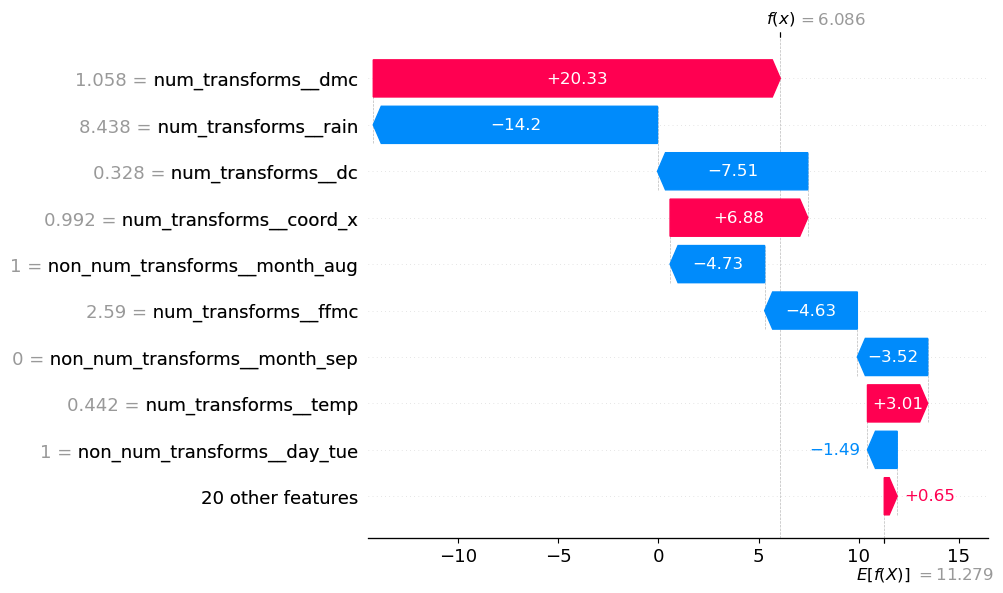

In [25]:
shap.plots.waterfall(shap_values[1])

*(Answer here.)*

1. Based on the result we can see that that the most influentials features are num_transforms_dmc which represents "The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material." which in turns determines that a greater amount of dry fuel augments the area affeted by fires. 

Feature num_transforms_dc represents "The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs." which in our model has a negative effect on 

The second feature of importance is rain with an somewhat obvious negative effect on the area affected by fires.

We can also see that the months of august and september have a negative impact predictor which coincides with the ending months of the fires season according to the websites cited below. 

2. As for the least important features the days of the week and 20 other features.

3. I will remove the less influential features, but also I will go again and check the model since intuitevely temperature should have a greater impact on humidity levels and thus fire conditions. 

I will remove specially days of the week variables since they don't seem to be relevant for general purposes (unless the are researched is a national park with tourist attraction where this could be valuable to identify if campers or visitors influence fires). 





Sources : 
"https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi"
"https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-fwi-system#:~:text=The%20Duff%20Moisture%20Code%20(DMC,to%20live%20fuel%20moisture%20stress."

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.